### Problem Statement

Context
This dataset consist of data From 1985 Ward's Automotive Yearbook. Here are the sources

Sources:

1) 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook.
2) Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038
3) Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037

Content
This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc…), and represents the average loss per car per year.

Note: Several of the attributes in the database could be used as a "class" attribute.

Inspiration
Please bring it on whatever inferences you can get it.

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
# Setting Styles
sns.set_palette(palette="coolwarm")

In [4]:
#  Reading Data
df = pd.read_csv("Automobile_data.csv")

In [5]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [6]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [7]:
df.nunique()

symboling              6
normalized-losses     52
make                  22
fuel-type              2
aspiration             2
num-of-doors           3
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  39
stroke                37
compression-ratio     32
horsepower            60
peak-rpm              24
city-mpg              29
highway-mpg           30
price                187
dtype: int64

In [8]:
#  Checking for null values
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [11]:
# Checking Data
df["num-of-doors"].value_counts()

four    114
two      89
?         2
Name: num-of-doors, dtype: int64

In [12]:
# Cleaning
df["num-of-doors"] = df["num-of-doors"].map({"four":4,"two":2,"?":4})

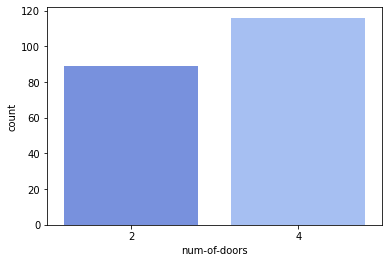

In [13]:
sns.countplot(df["num-of-doors"])

In [15]:
# Range is from -2 to +3 where -2 is safest and +3 means risky
df["symboling"].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

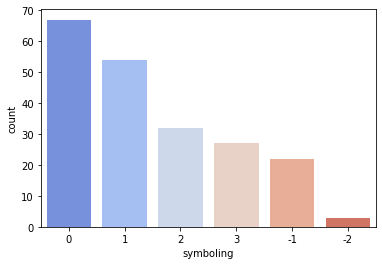

In [16]:
sns.countplot(df["symboling"],order=df["symboling"].value_counts().index)

In [17]:
# Its clear that aspiration are standard, commonly. Except for some turbo versions
df["aspiration"].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

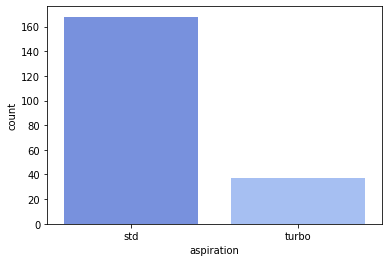

In [18]:
sns.countplot(df["aspiration"])

In [19]:
# Similarly gas is more preferred over diesel
df["fuel-type"].value_counts()

gas       185
diesel     20
Name: fuel-type, dtype: int64

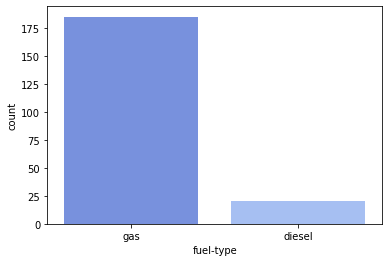

In [20]:
sns.countplot(df["fuel-type"])

In [21]:
# As data suggests cars styles are in order sedan>hatchback>wagon>hardtop>convertible
df["body-style"].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

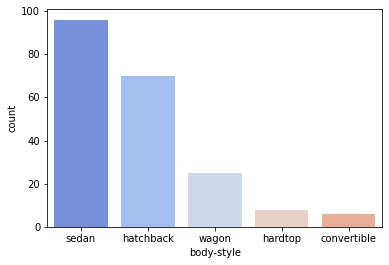

In [22]:
sns.countplot(df["body-style"],order=df["body-style"].value_counts().index)

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64


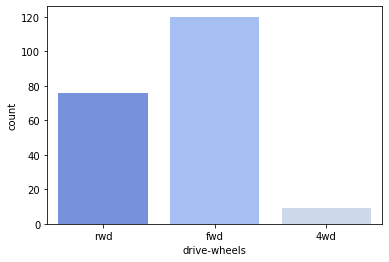

In [23]:
#  forward wheel drive are way more in comparison to rear wheel and Four wheel drive
print(df["drive-wheels"].value_counts())
sns.countplot(df["drive-wheels"])

In [24]:
#  Engine is also preferred on front side in comparison
df["engine-location"].value_counts()

front    202
rear       3
Name: engine-location, dtype: int64

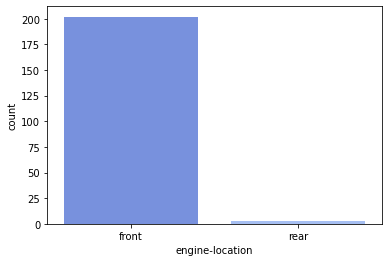

In [25]:
sns.countplot(df["engine-location"])

In [26]:
# df['num-of-cylinders']=df['num-of-cylinders'].map({'four':4,'five':5,'six':6,'?':4})

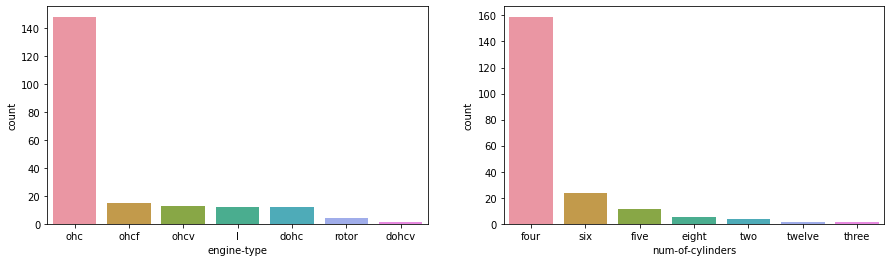

In [51]:
# engine-type number-of-cylinders
# plt.figure(figsize=(16,8))
# print(f'{df["engine-type"].value_counts()}{df["num-of-cylinders"].value_counts()}')
f,ax = plt.subplots(nrows=1,ncols=2)
f.set_figwidth(15)
sns.countplot(df["engine-type"],ax=ax[0],order=df["engine-type"].value_counts().index)
sns.countplot(df["num-of-cylinders"],ax=ax[1],order=df["num-of-cylinders"].value_counts().index)

###### Ohc and 4 cylinder engine out numbers others as graph suggests 

Text(0.5, 1.0, 'Fuel-System')

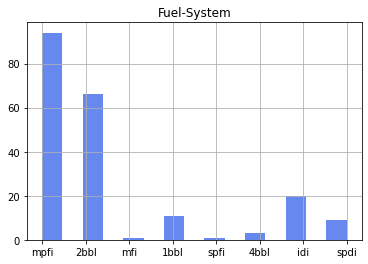

In [33]:
# Checking fuel system
df["fuel-system"].hist(bins=15)
plt.title("Fuel-System")

In [34]:
# Cleaning data
a=df[df['price']!='?']
b=(a['price'].astype(int)).mean()
df['price']=df['price'].replace('?',b).astype(int)

a=df[df['horsepower']!='?']
b=(a['horsepower'].astype(int)).mean()
df['horsepower']=df['horsepower'].replace('?',b).astype(int)

a=df[df['bore']!='?']
b=(a['bore'].astype(float)).mean()
df['bore']=df['bore'].replace('?',b).astype(float)

a=df[df['stroke']!='?']
b=(a['stroke'].astype(float)).mean()
df['stroke']=df['stroke'].replace('?',b).astype(float)

a=df[df['peak-rpm']!='?']
b=(a['peak-rpm'].astype(float)).mean()
df['peak-rpm']=df['peak-rpm'].replace('?',b).astype(float)

In [35]:
df.describe()

,symboling,num-of-doors,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,3.131707,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.253659,5125.369458,25.219512,30.751220,13207.126829
std,1.245307,0.993715,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.519219,476.979093,6.542142,6.886443,7868.768212
min,-2.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [37]:
df.sample(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
111,0,161,peugot,gas,std,4,sedan,rwd,front,107.9,...,120,mpfi,3.46,2.19,8.4,95,5000.0,19,24,15580
43,0,?,isuzu,gas,std,4,sedan,rwd,front,94.3,...,111,2bbl,3.31,3.23,8.5,78,4800.0,24,29,6785
84,3,?,mitsubishi,gas,turbo,2,hatchback,fwd,front,95.9,...,156,spdi,3.59,3.86,7.0,145,5000.0,19,24,14489
20,0,81,chevrolet,gas,std,4,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400.0,38,43,6575
101,0,128,nissan,gas,std,4,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200.0,17,22,13499


In [44]:
len(df[df["normalized-losses"]=="?"])

41

In [46]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [48]:
# Checking Car Maker Column
df["make"].value_counts()

toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

In [82]:
# fig, ax = plt.subplots()
# labels=df["make"].unique()
# ax.pie(df["make"].value_counts(),labels=labels,radius=1.5,frame=True)
# ax.axis('equal')
# ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

Text(0.5, 0, "Company's")

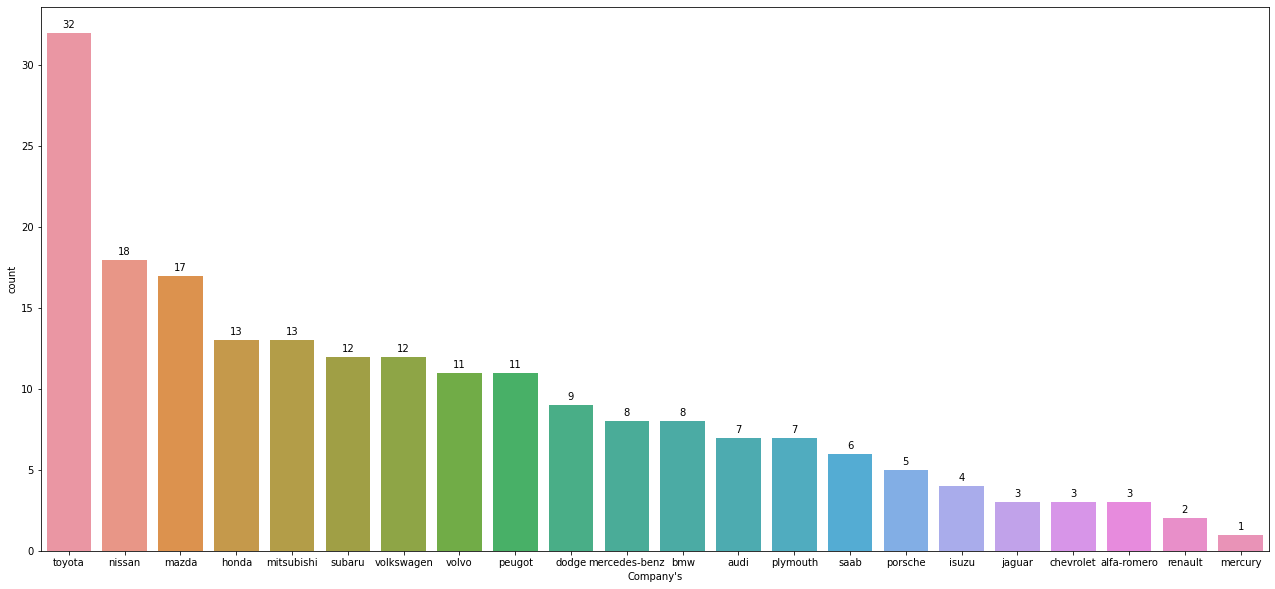

In [98]:
plt.figure(figsize=(22,10))
ax = sns.countplot(df["make"],order=df["make"].value_counts().index)
rects = ax.patches
# For labelling
for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
plt.xlabel("Company's")

##### Thus, Toyota out numbers other company's in comparison of total number of observations as seen above

In [99]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [100]:
df.sample(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
66,0,?,mazda,diesel,std,4,sedan,rwd,front,104.9,...,134,idi,3.43,3.64,22.0,72,4200.0,31,39,18344
157,0,91,toyota,gas,std,4,hatchback,fwd,front,95.7,...,98,2bbl,3.19,3.03,9.0,70,4800.0,30,37,7198
54,1,113,mazda,gas,std,4,sedan,fwd,front,93.1,...,91,2bbl,3.08,3.15,9.0,68,5000.0,31,38,7395


Text(0.5, 0.98, 'Top Curb-Weights, Wheel Base, Widths and Heights, respectively')

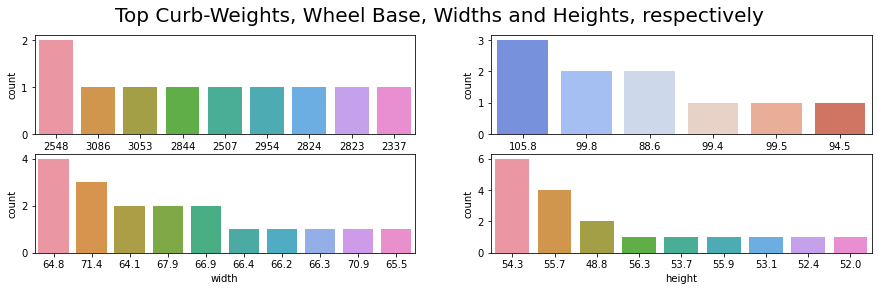

In [126]:
# Checking Top Curb-Weights, Widths and Heights columns
f,ax = plt.subplots(nrows=2,ncols=2)
f.set_figwidth(15)
sns.countplot(df["curb-weight"].head(10),ax=ax[0][0],order=df['curb-weight'].head(10).value_counts().index)
sns.countplot(df["wheel-base"].head(10),ax=ax[0][1],order=df['wheel-base'].head(10).value_counts().index)
sns.countplot(df['width'].head(18),ax=ax[1][0],order=df['width'].head(18).value_counts().index)
sns.countplot(df['height'].head(18),ax=ax[1][1],order=df['height'].head(18).value_counts().index)
plt.suptitle('Top Curb-Weights, Wheel Base, Widths and Heights, respectively',fontsize=20)

Text(0.5, 1.0, 'Mileage(Highway) Vs Makers')

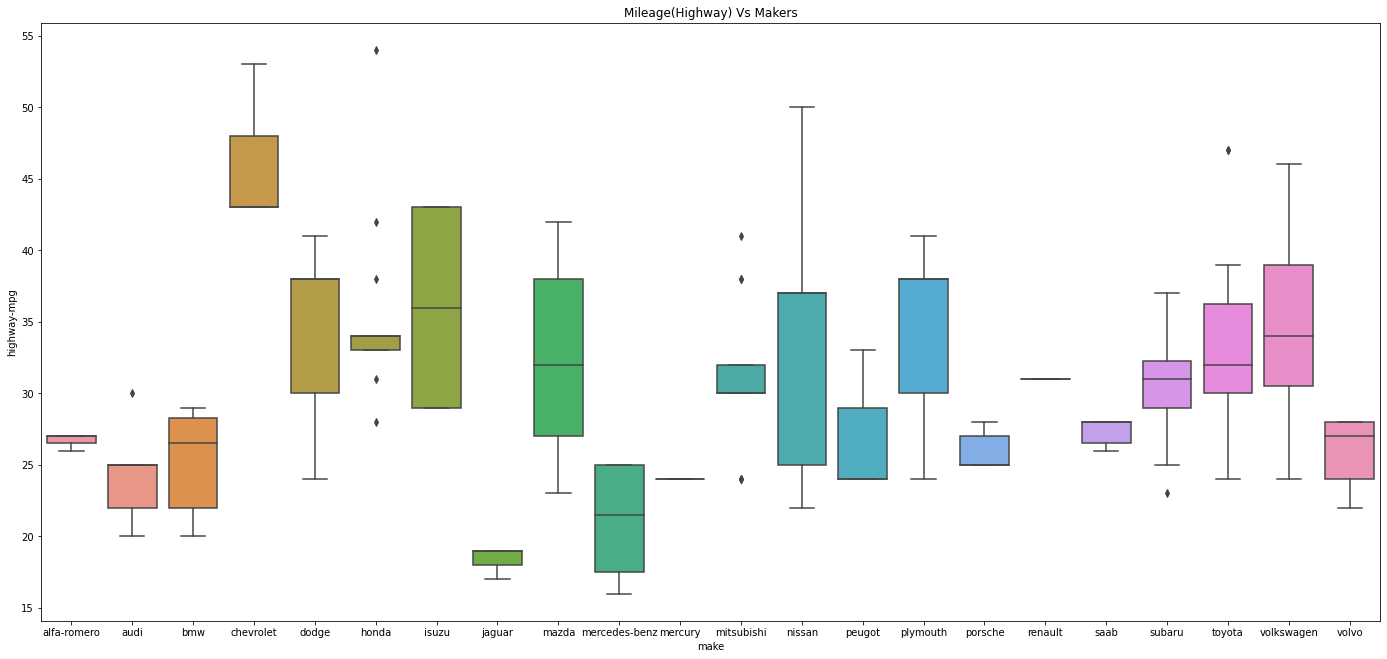

In [144]:
# Checking Highway - Mpg w.r.t.o makers 
plt.figure(figsize=(24,11))
sns.boxplot(x="make",y="highway-mpg",data=df)
plt.title("Mileage(Highway) Vs Makers")

Text(0.5, 1.0, 'Mileage(City) Vs Makers')

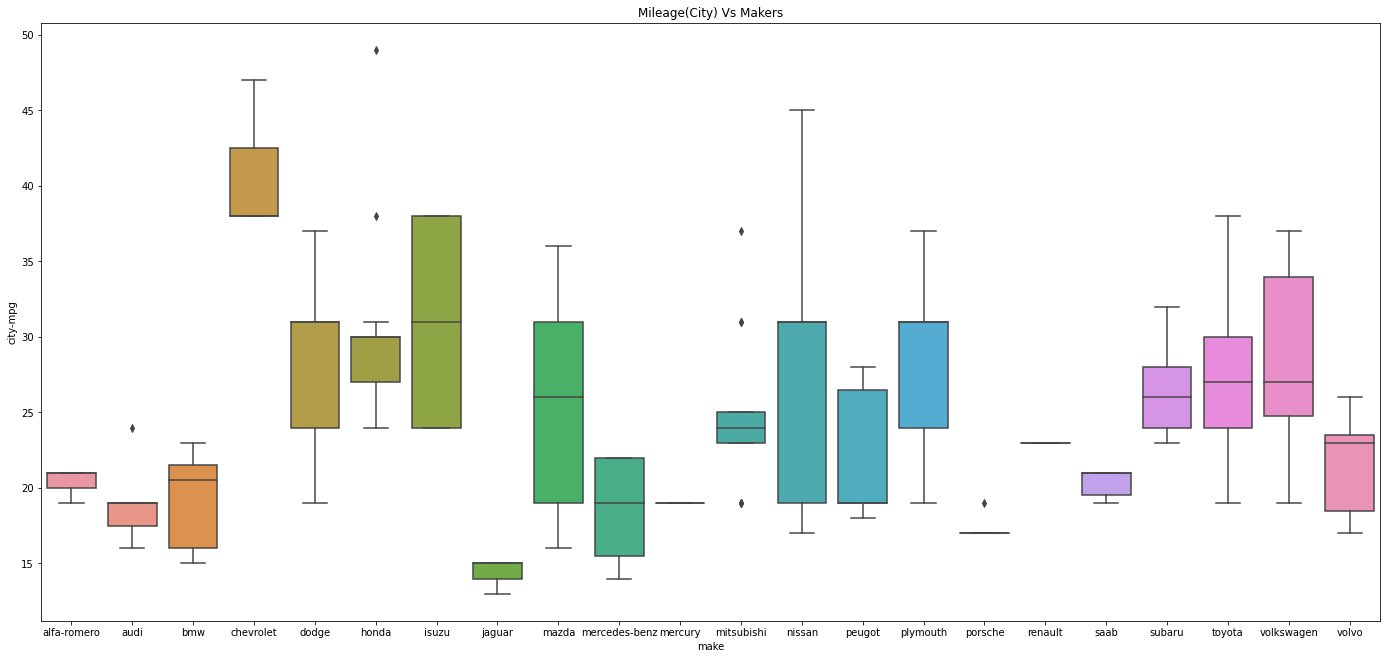

In [145]:
# Checking City - Mpg w.r.t.o makers 
plt.figure(figsize=(24,11))
sns.boxplot(x="make",y="city-mpg",data=df)
plt.title("Mileage(City) Vs Makers")

Text(0.5, 1.0, 'Price Distributions')

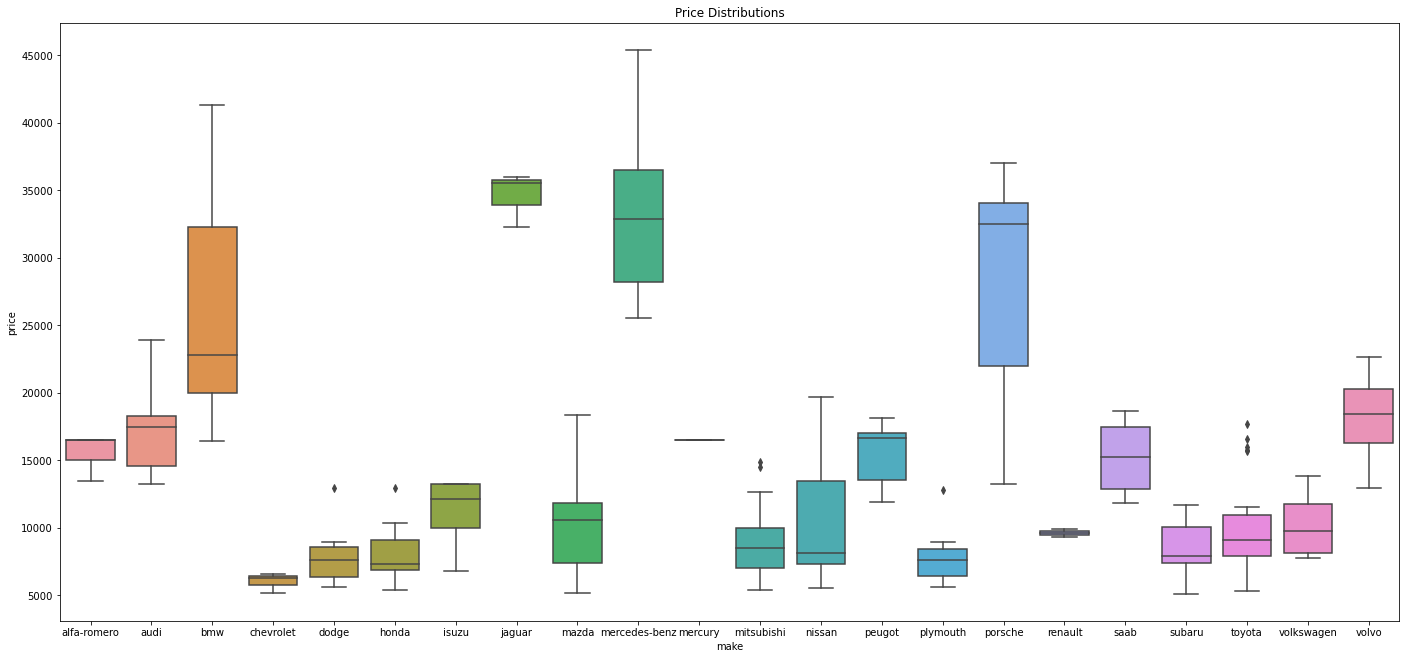

In [146]:
#  Price distributions of makers
plt.figure(figsize=(24,11))
sns.boxplot(x="make",y="price",data=df)
plt.title("Price Distributions")

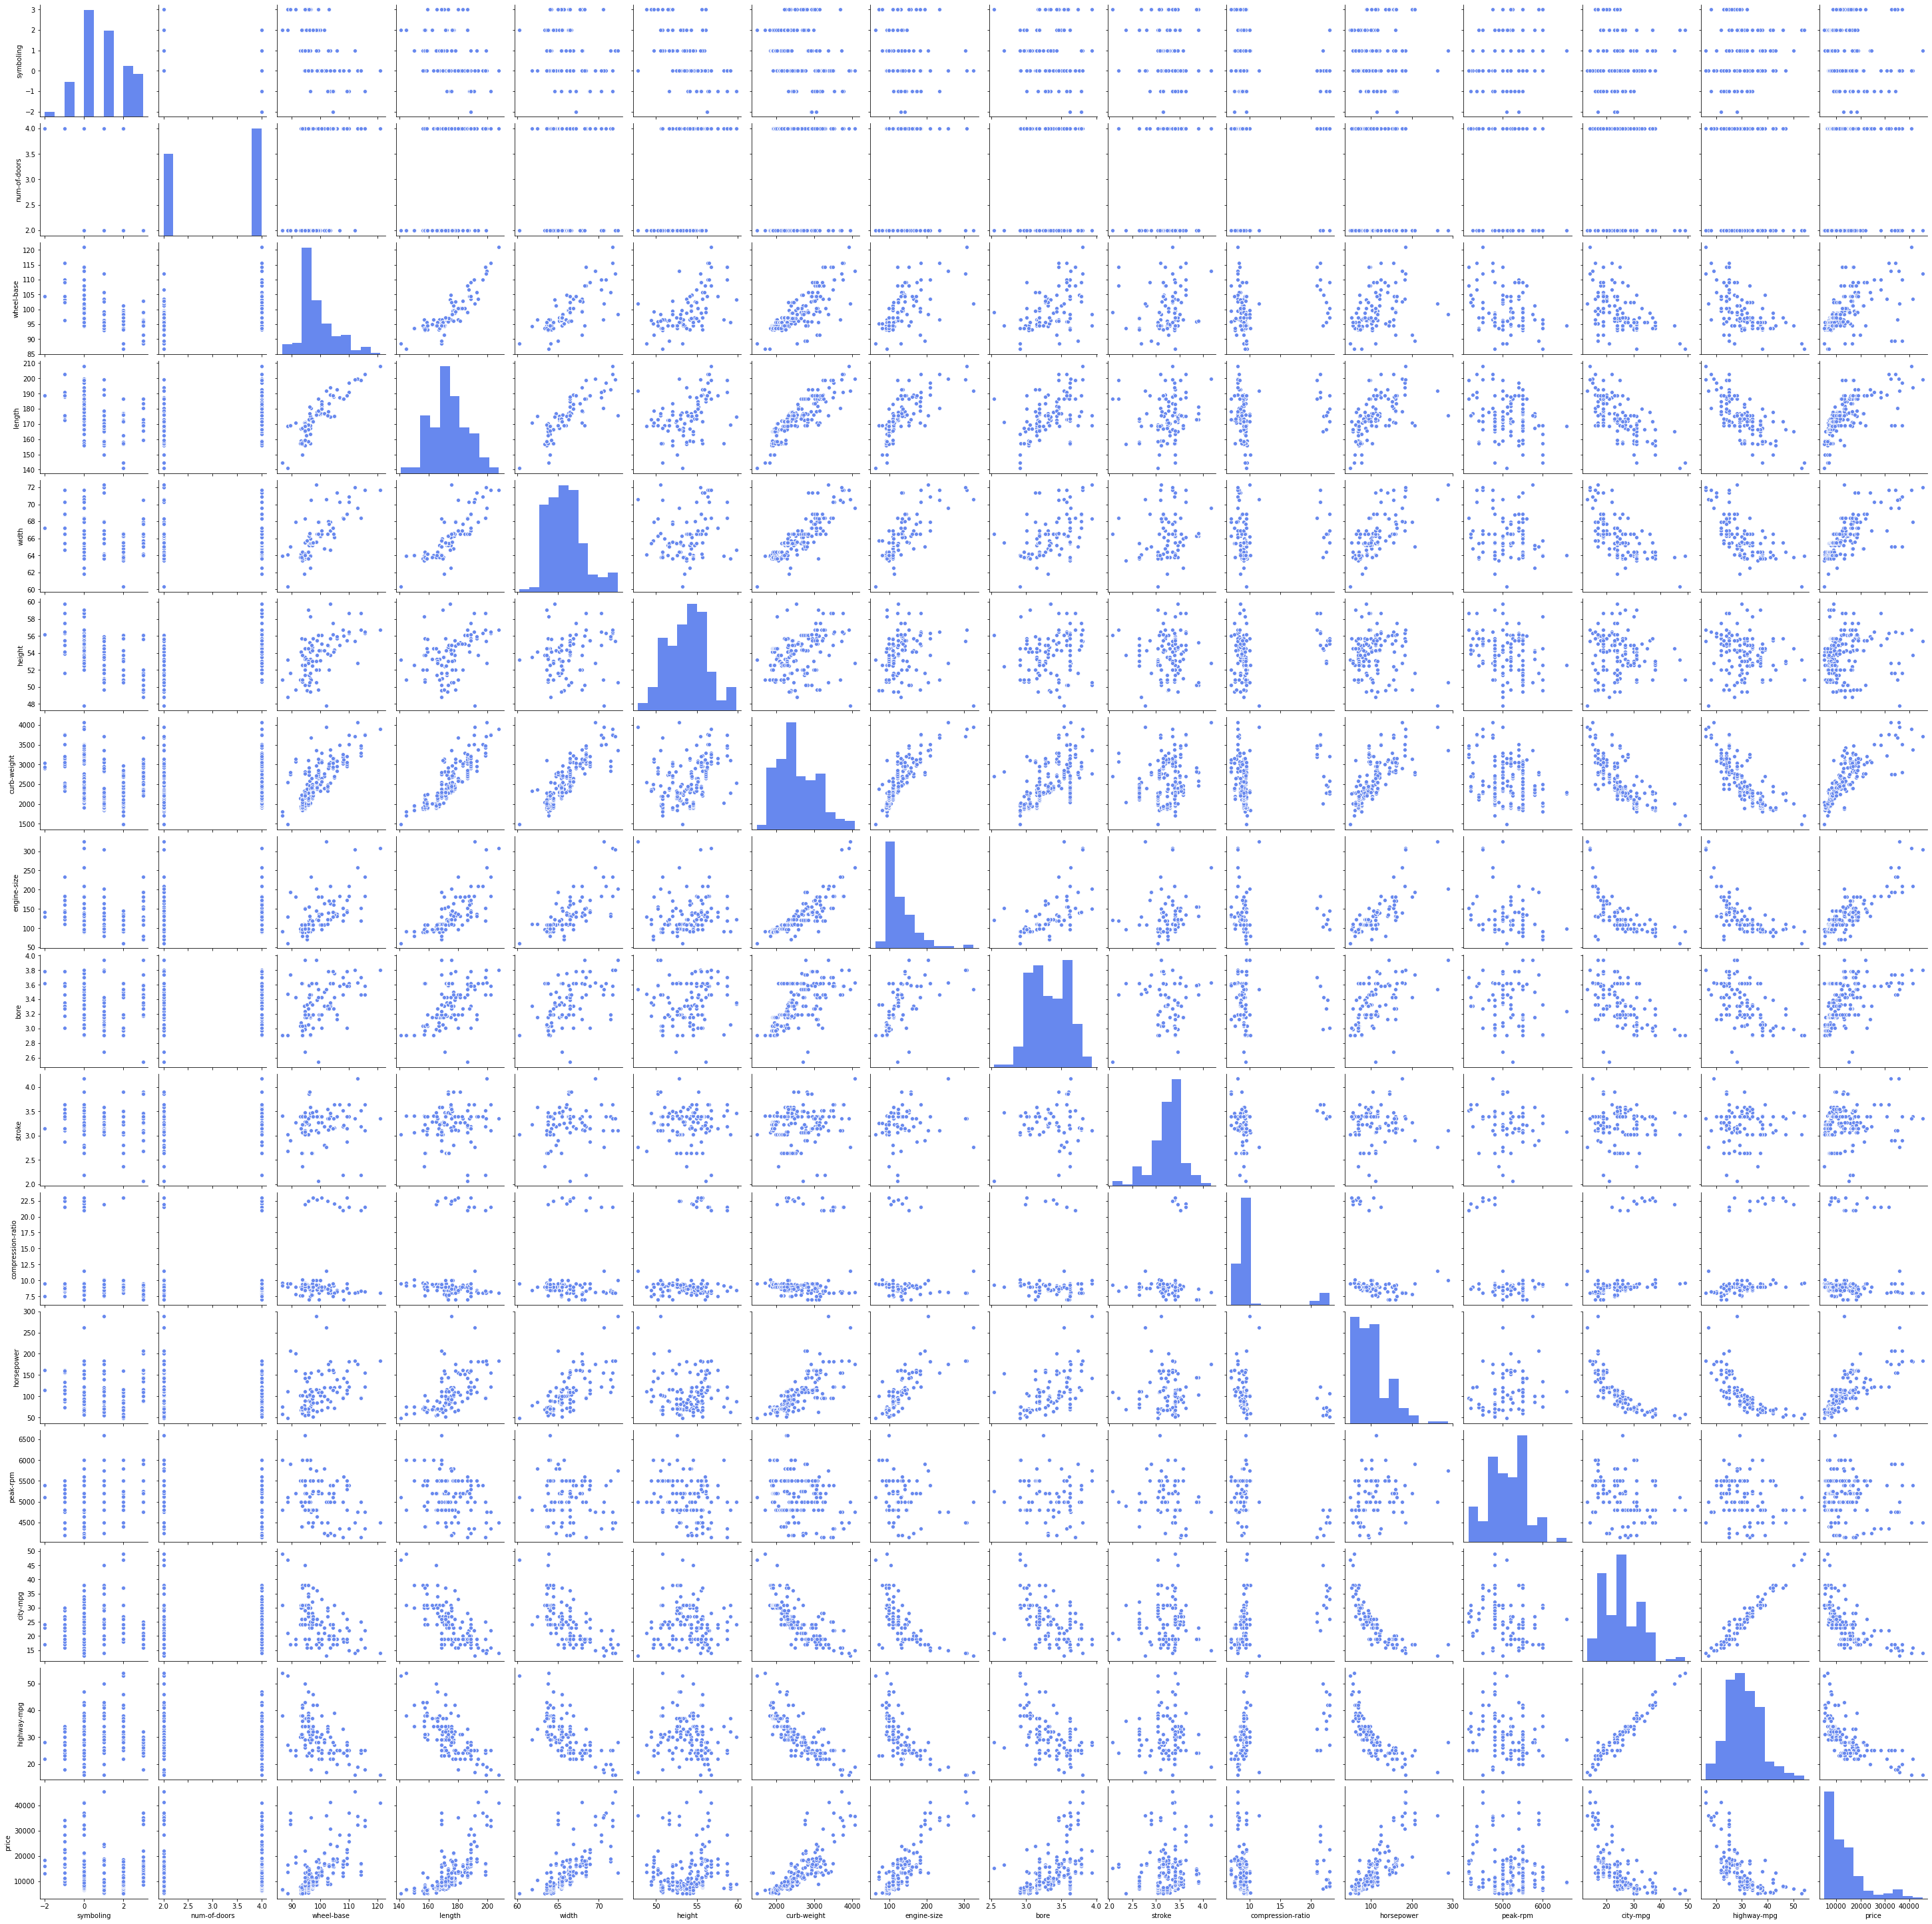

In [147]:
# xd
sns.pairplot(df)

##### 1.Vehicle with high price have low mileage.This because high priced vehicles go into luxary segment which are meant for high performance and running cost is not very important in this segment.

##### 2.As the engine power(horse power) increases the price of the vehicle increases.More horse power also means bigger engine size

##### 3.As the engine size increases the price of the vehicle increases.Weight of the engine increases with the increase in engine size.

##### 4.High curb weight increases price of the vehicle and decreases the mileage of the vehicle.

##### 5.Width has very good positive correlation to the price of the vehicle.


In [149]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [155]:
#  Checking other relations
df.groupby("fuel-type").mean()

,symboling,num-of-doors,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
fuel-type,,,,,,,,,,,,,,,,
diesel,0.100000,3.70000,104.390000,182.010000,67.430000,55.835000,2898.800000,135.700000,3.374500,3.48550,22.005000,84.450000,4435.000000,30.30000,34.750000,15838.150000
gas,0.913514,3.07027,98.147568,173.188649,65.743243,53.496757,2518.459459,125.956757,3.324914,3.23055,8.860108,106.394595,5200.003994,24.67027,30.318919,12922.691892


#### So, as seen on an average scale we can stat that:
##### 1. Diesel Cars tend to have more curb weight and engine size. 
##### 2.Gas cars have more horse powers and rpm. 
##### 3.Diesel excels in mpg in both highway and city.
##### 4.Diesel cars are more expensive on a mean scale.

In [156]:
#  dohcv leads in power comparison
df.groupby("engine-type").mean()

,symboling,num-of-doors,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
engine-type,,,,,,,,,,,,,,,,
dohc,1.416667,2.833333,100.433333,182.500000,66.400000,52.733333,2976.833333,157.333333,3.403333,3.283333,9.000000,146.000000,5375.000000,20.000000,24.833333,18116.416667
dohcv,1.000000,2.000000,98.400000,175.700000,72.300000,50.500000,3366.000000,203.000000,3.940000,3.110000,10.000000,288.000000,5750.000000,17.000000,28.000000,13207.000000
l,0.166667,3.833333,108.383333,186.966667,67.716667,56.850000,3076.583333,129.583333,3.526667,3.149167,13.625000,95.500000,4704.166667,24.500000,28.833333,14627.583333
ohc,0.770270,3.148649,97.995946,171.953378,65.527703,53.779730,2422.344595,117.540541,3.260946,3.326486,10.210270,93.837838,5133.788776,26.804054,32.567568,11600.594595
ohcf,1.000000,3.200000,94.840000,168.866667,64.960000,53.320000,2407.133333,124.466667,3.644000,2.673333,8.953333,110.400000,5000.000000,24.466667,29.600000,13738.600000
ohcv,0.769231,2.923077,102.592308,185.592308,68.776923,53.115385,3355.769231,216.692308,3.453846,3.201538,8.823077,169.538462,5015.384615,16.769231,21.230769,25098.384615
rotor,3.000000,2.000000,95.300000,169.000000,65.700000,49.600000,2411.250000,72.500000,3.329751,3.255423,9.400000,109.500000,6000.000000,16.750000,23.000000,13020.000000


In [157]:
df.groupby("drive-wheels").mean()

,symboling,num-of-doors,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
drive-wheels,,,,,,,,,,,,,,,,
4wd,0.444444,3.555556,96.822222,171.411111,65.211111,55.400000,2609.111111,110.111111,3.391111,2.895556,8.344444,95.333333,4911.111111,23.111111,27.222222,10570.555556
fwd,0.941667,3.166667,96.429167,168.780000,65.057500,53.519167,2264.408333,108.783333,3.197167,3.288167,9.933500,86.275000,5175.422824,28.316667,34.225000,9310.816667
rwd,0.710526,3.026316,102.660526,182.681579,67.332895,53.851316,3008.947368,157.513158,3.531829,3.246338,10.685526,133.697368,5071.710526,20.578947,25.684211,19671.421053


##### "rwd" tend to have more curb weight, engine size and horse power but lags in rpm & mpg to "fwd", but way expensive in comparison to other modes.

In [158]:
df.groupby("engine-location").mean()

,symboling,num-of-doors,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
engine-location,,,,,,,,,,,,,,,,
front,0.80198,3.148515,98.894059,174.125743,65.921287,53.756436,2552.371287,125.910891,3.323658,3.260701,10.152079,102.727723,5113.865044,25.341584,30.836634,12890.480198
rear,3.00000,2.000000,89.500000,168.900000,65.000000,51.600000,2770.666667,194.000000,3.740000,2.900000,9.500000,207.000000,5900.000000,17.000000,25.000000,34528.000000


##### Rear engine locations are preffered for cars with 2 doors i.e. mainly premium segments that means more bigger engine, rpm ,horsepower and more expensive with less mpg

In [162]:
df.groupby("num-of-cylinders").mean().sort_values(by="horsepower")

,symboling,num-of-doors,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
num-of-cylinders,,,,,,,,,,,,,,,,
three,2.000000,2.000000,88.400000,141.100000,60.300000,53.200000,1488.000000,61.000000,2.910000,3.030000,9.500000,48.000000,5100.000000,47.000000,53.000000,5151.000000
four,0.811321,3.169811,97.756604,171.400000,65.305660,53.803145,2394.515723,112.798742,3.305912,3.236730,10.115849,90.723270,5113.212194,27.119497,32.773585,10339.723270
two,3.000000,2.000000,95.300000,169.000000,65.700000,49.600000,2411.250000,72.500000,3.329751,3.255423,9.400000,109.500000,6000.000000,16.750000,23.000000,13020.000000
five,0.363636,3.454545,105.345455,187.481818,69.481818,55.290909,3132.636364,152.181818,3.320909,3.487273,13.027273,122.454545,5081.818182,19.545455,23.909091,21207.545455
six,0.833333,3.083333,101.162500,182.937500,67.137500,53.391667,3133.958333,185.291667,3.425000,3.314167,9.429167,161.916667,5143.750000,18.291667,23.833333,23671.833333
eight,0.800000,2.800000,108.700000,193.180000,71.640000,53.980000,3681.200000,256.600000,3.692000,3.202000,8.520000,193.200000,4850.000000,15.400000,19.200000,33761.400000
twelve,0.000000,2.000000,102.000000,191.700000,70.600000,47.800000,3950.000000,326.000000,3.540000,2.760000,11.500000,262.000000,5000.000000,13.000000,17.000000,36000.000000


##### 1.Number of cylinders directly corresponds to more power, bigger engine (except for 2 cylinder which has more power than 3/4 cylinder engine), more curb weight, more rpm,lesser milege and more price.
##### 2.Cylinder 3&4 are cheapest with low power but leading milege i.e. car for a middle class families.
##### 3.Two and 12 cylinder engines are preferred in two door cars



### Thanks